In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

np.random.seed(7)

In [2]:
# Set output folder, subfolder
output_folder = "outputs"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)
if not os.path.exists(os.path.join(output_folder,"figure_panels")):
    os.makedirs(os.path.join(output_folder,"figure_panels"), exist_ok=True)

In [3]:
# Import the HeLa DMEM gene-level profiles
df_hits_pca_DMEM = pd.read_csv("../3_HeLa_WGS_Summary/outputs/HeLa_DMEM_hit_list_PCA.csv")

# Import annotated gene sets
with open("../common_files/annotated_gene_sets.json") as f:
    gene_set_dict = json.load(f)

# Import the HeLa DMEM hits from the hit calling process then subset the gene level profiles for all hits 
comp_spec_hits = pd.read_csv('../3_HeLa_WGS_Summary/outputs/HeLa_DMEM_plate_level_median_per_feat_sig_genes_5_fdr_compartment_specific_hits.csv').set_index('Gene')
whole_cell_hits = pd.read_csv('../3_HeLa_WGS_Summary/outputs/HeLa_DMEM_plate_level_median_per_feat_sig_genes_5_fdr_whole_cell_hits.csv').set_index('Gene')
hit_list = list(comp_spec_hits.index) + list(whole_cell_hits.index)

In [4]:
# Function to perform hierarchial clustering based on profiles correlation and drawing the heatmap
def clustered_heat_map(data,file_name,font_scale=0.8,linewidth=1):

        corr = data.corr()
        sns.set(font_scale=font_scale)

        g = sns.clustermap(
            corr, 
            vmin=-1, vmax=1, center=0,
            method = 'ward',
            figsize = (30 ,30),
            cmap=sns.diverging_palette(250, 10 ,s=100,l=35, n=100),
            linewidth = linewidth,
            linecolor='white',
            dendrogram_ratio =0.1,
            cbar_kws={"shrink": .05,"aspect":40}
        )
        ax = g.ax_heatmap
        ax.set_xlabel("")
        ax.set_ylabel("")
        g.cax.set_visible(False)
        g.ax_row_dendrogram.set_visible(False)
        g.ax_col_dendrogram.set_visible(False)
        plt.savefig(os.path.join(output_folder,'figure_panels',file_name),bbox_inches='tight', dpi=600,facecolor='w', edgecolor='w')
        plt.show()

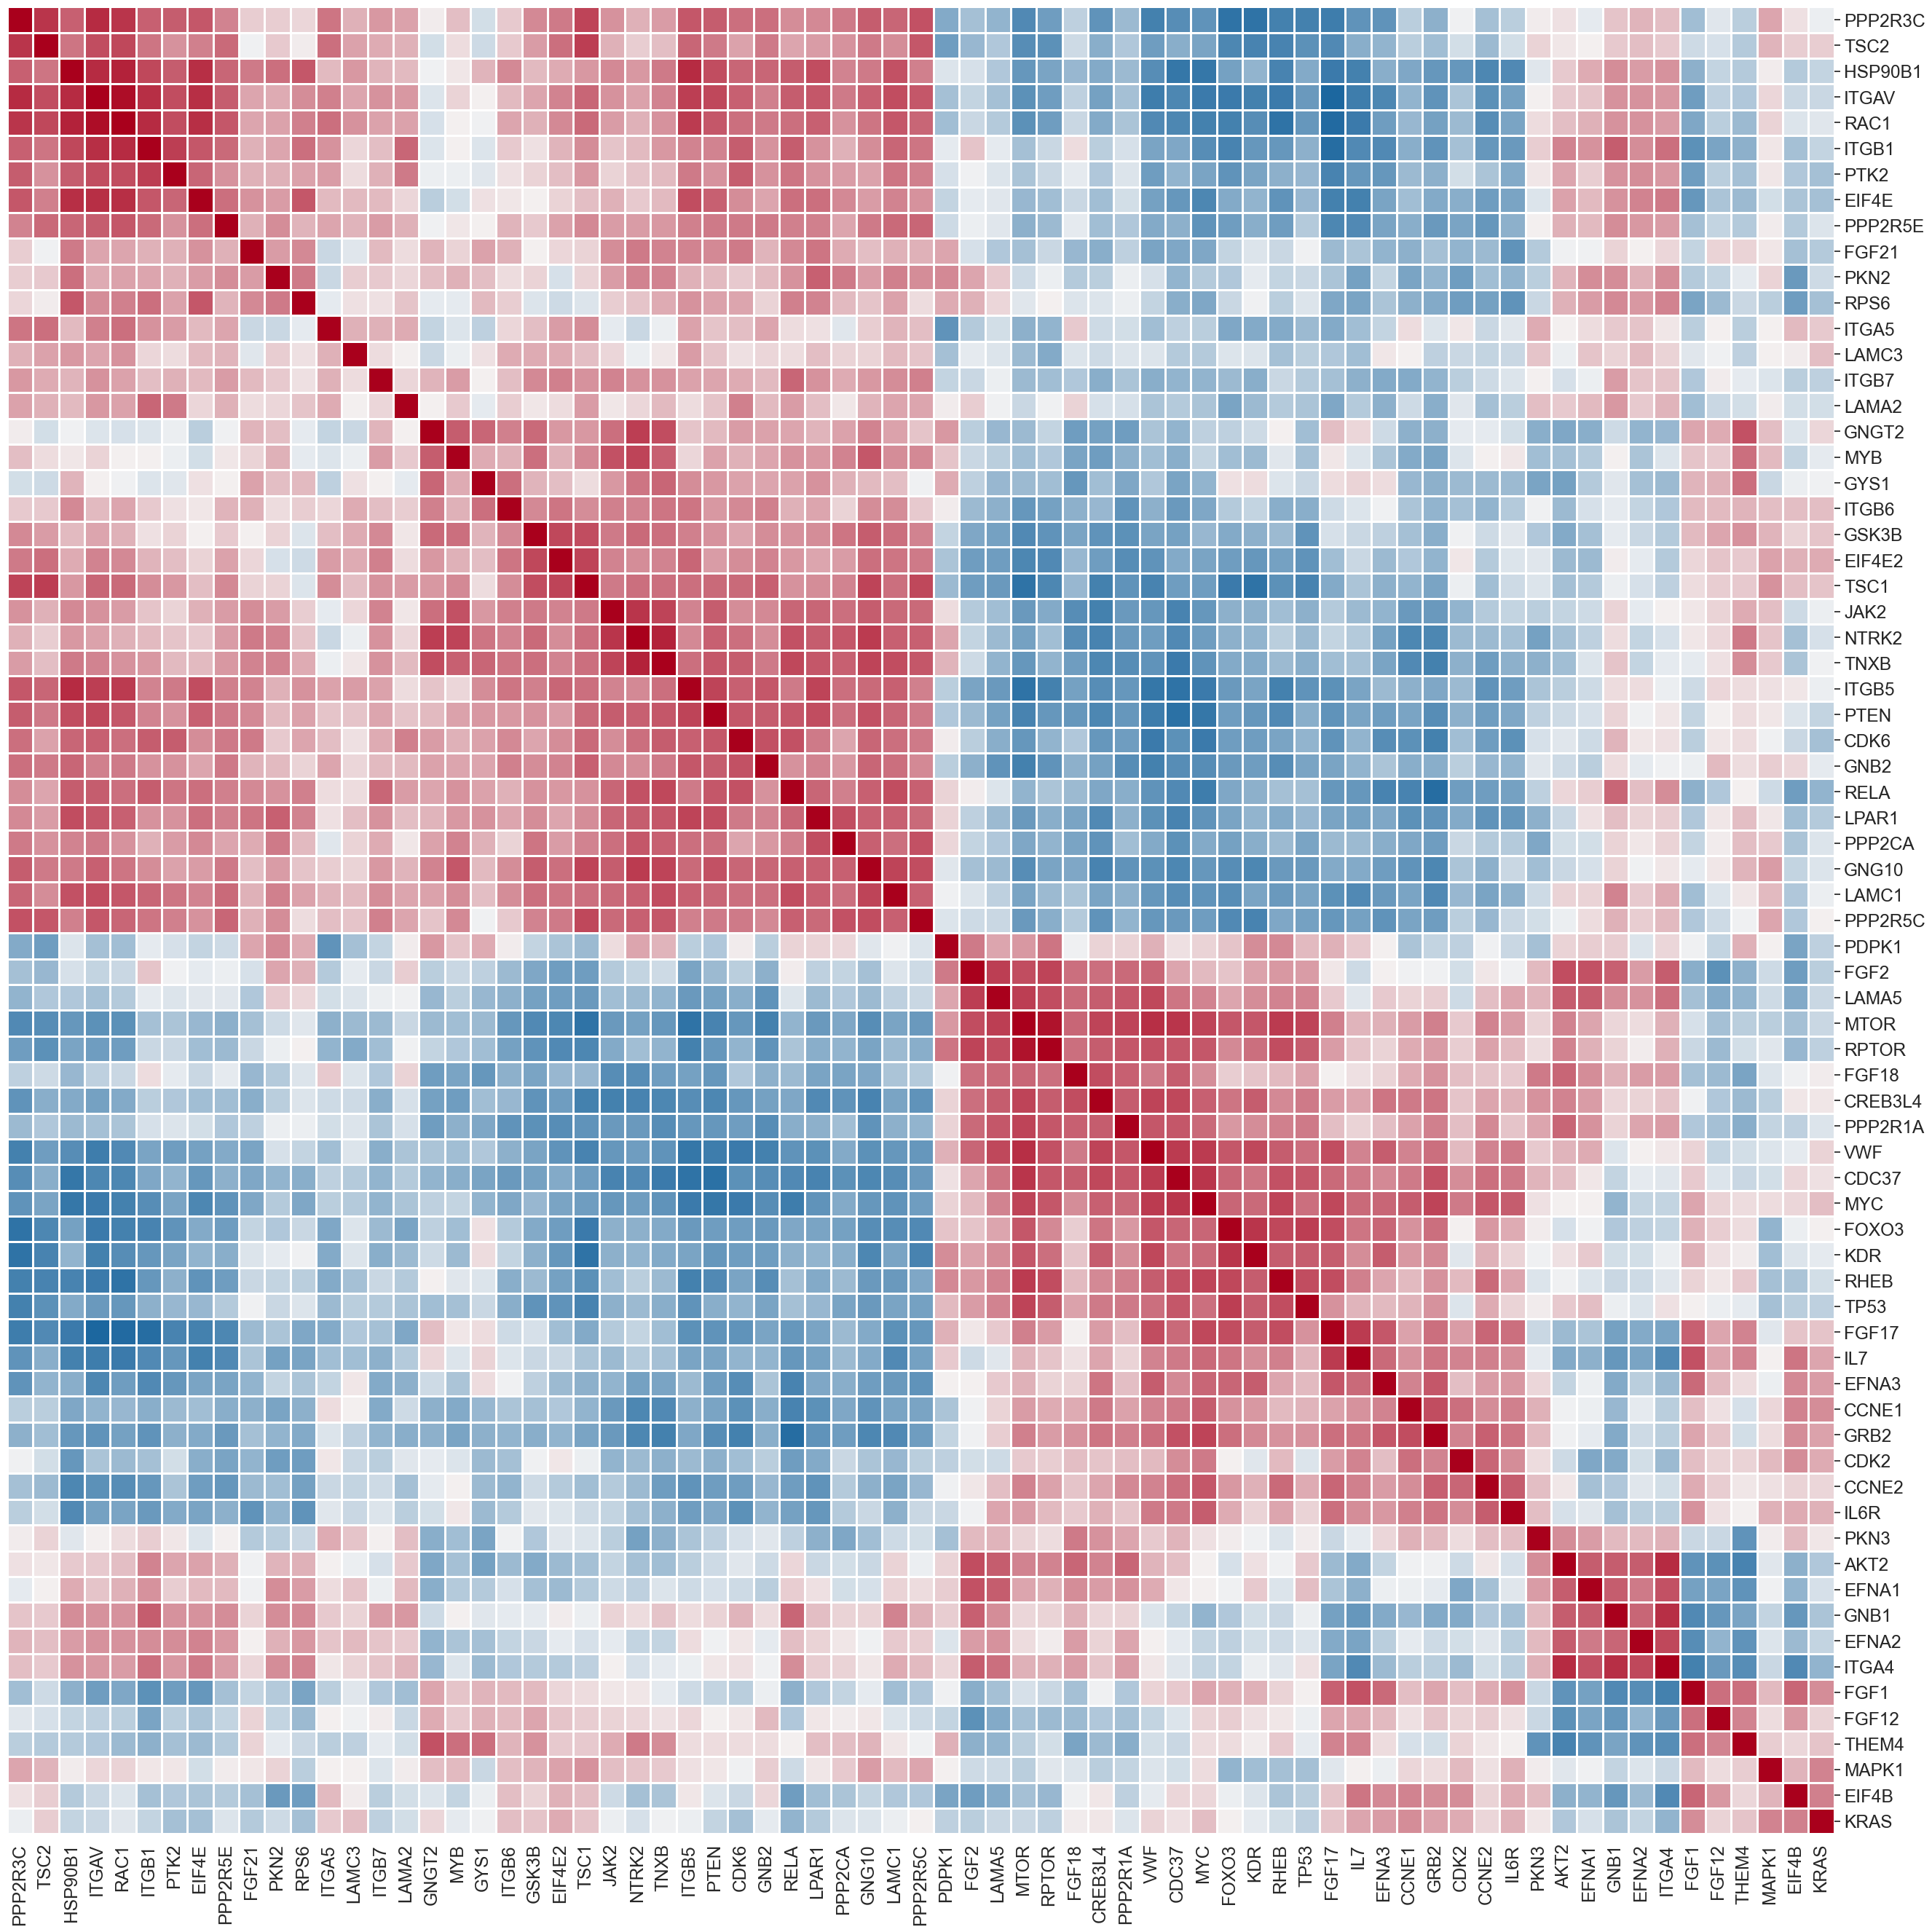

In [5]:
# Subset the profiles to select relevant genes
gene_set = 'PI3KAkt_Signaling'
gene_list = gene_set_dict[gene_set]
genes_df =  df_hits_pca_DMEM[df_hits_pca_DMEM['Metadata_Foci_Barcode_MatchedTo_GeneCode'].isin(gene_list)]
genes_profiles = genes_df.set_index('Metadata_Foci_Barcode_MatchedTo_GeneCode')
# Cluster the profiles & draw the heatmap
clustered_heat_map(genes_profiles.T,                
                   f'HeLa_DMEM_median_profile_heatmap_clustering_gene_hits_{gene_set}_plate_level.png',
                   1.6,
                   0.8)


/Users/eweisbar/miniconda3/envs/periscope_2022/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


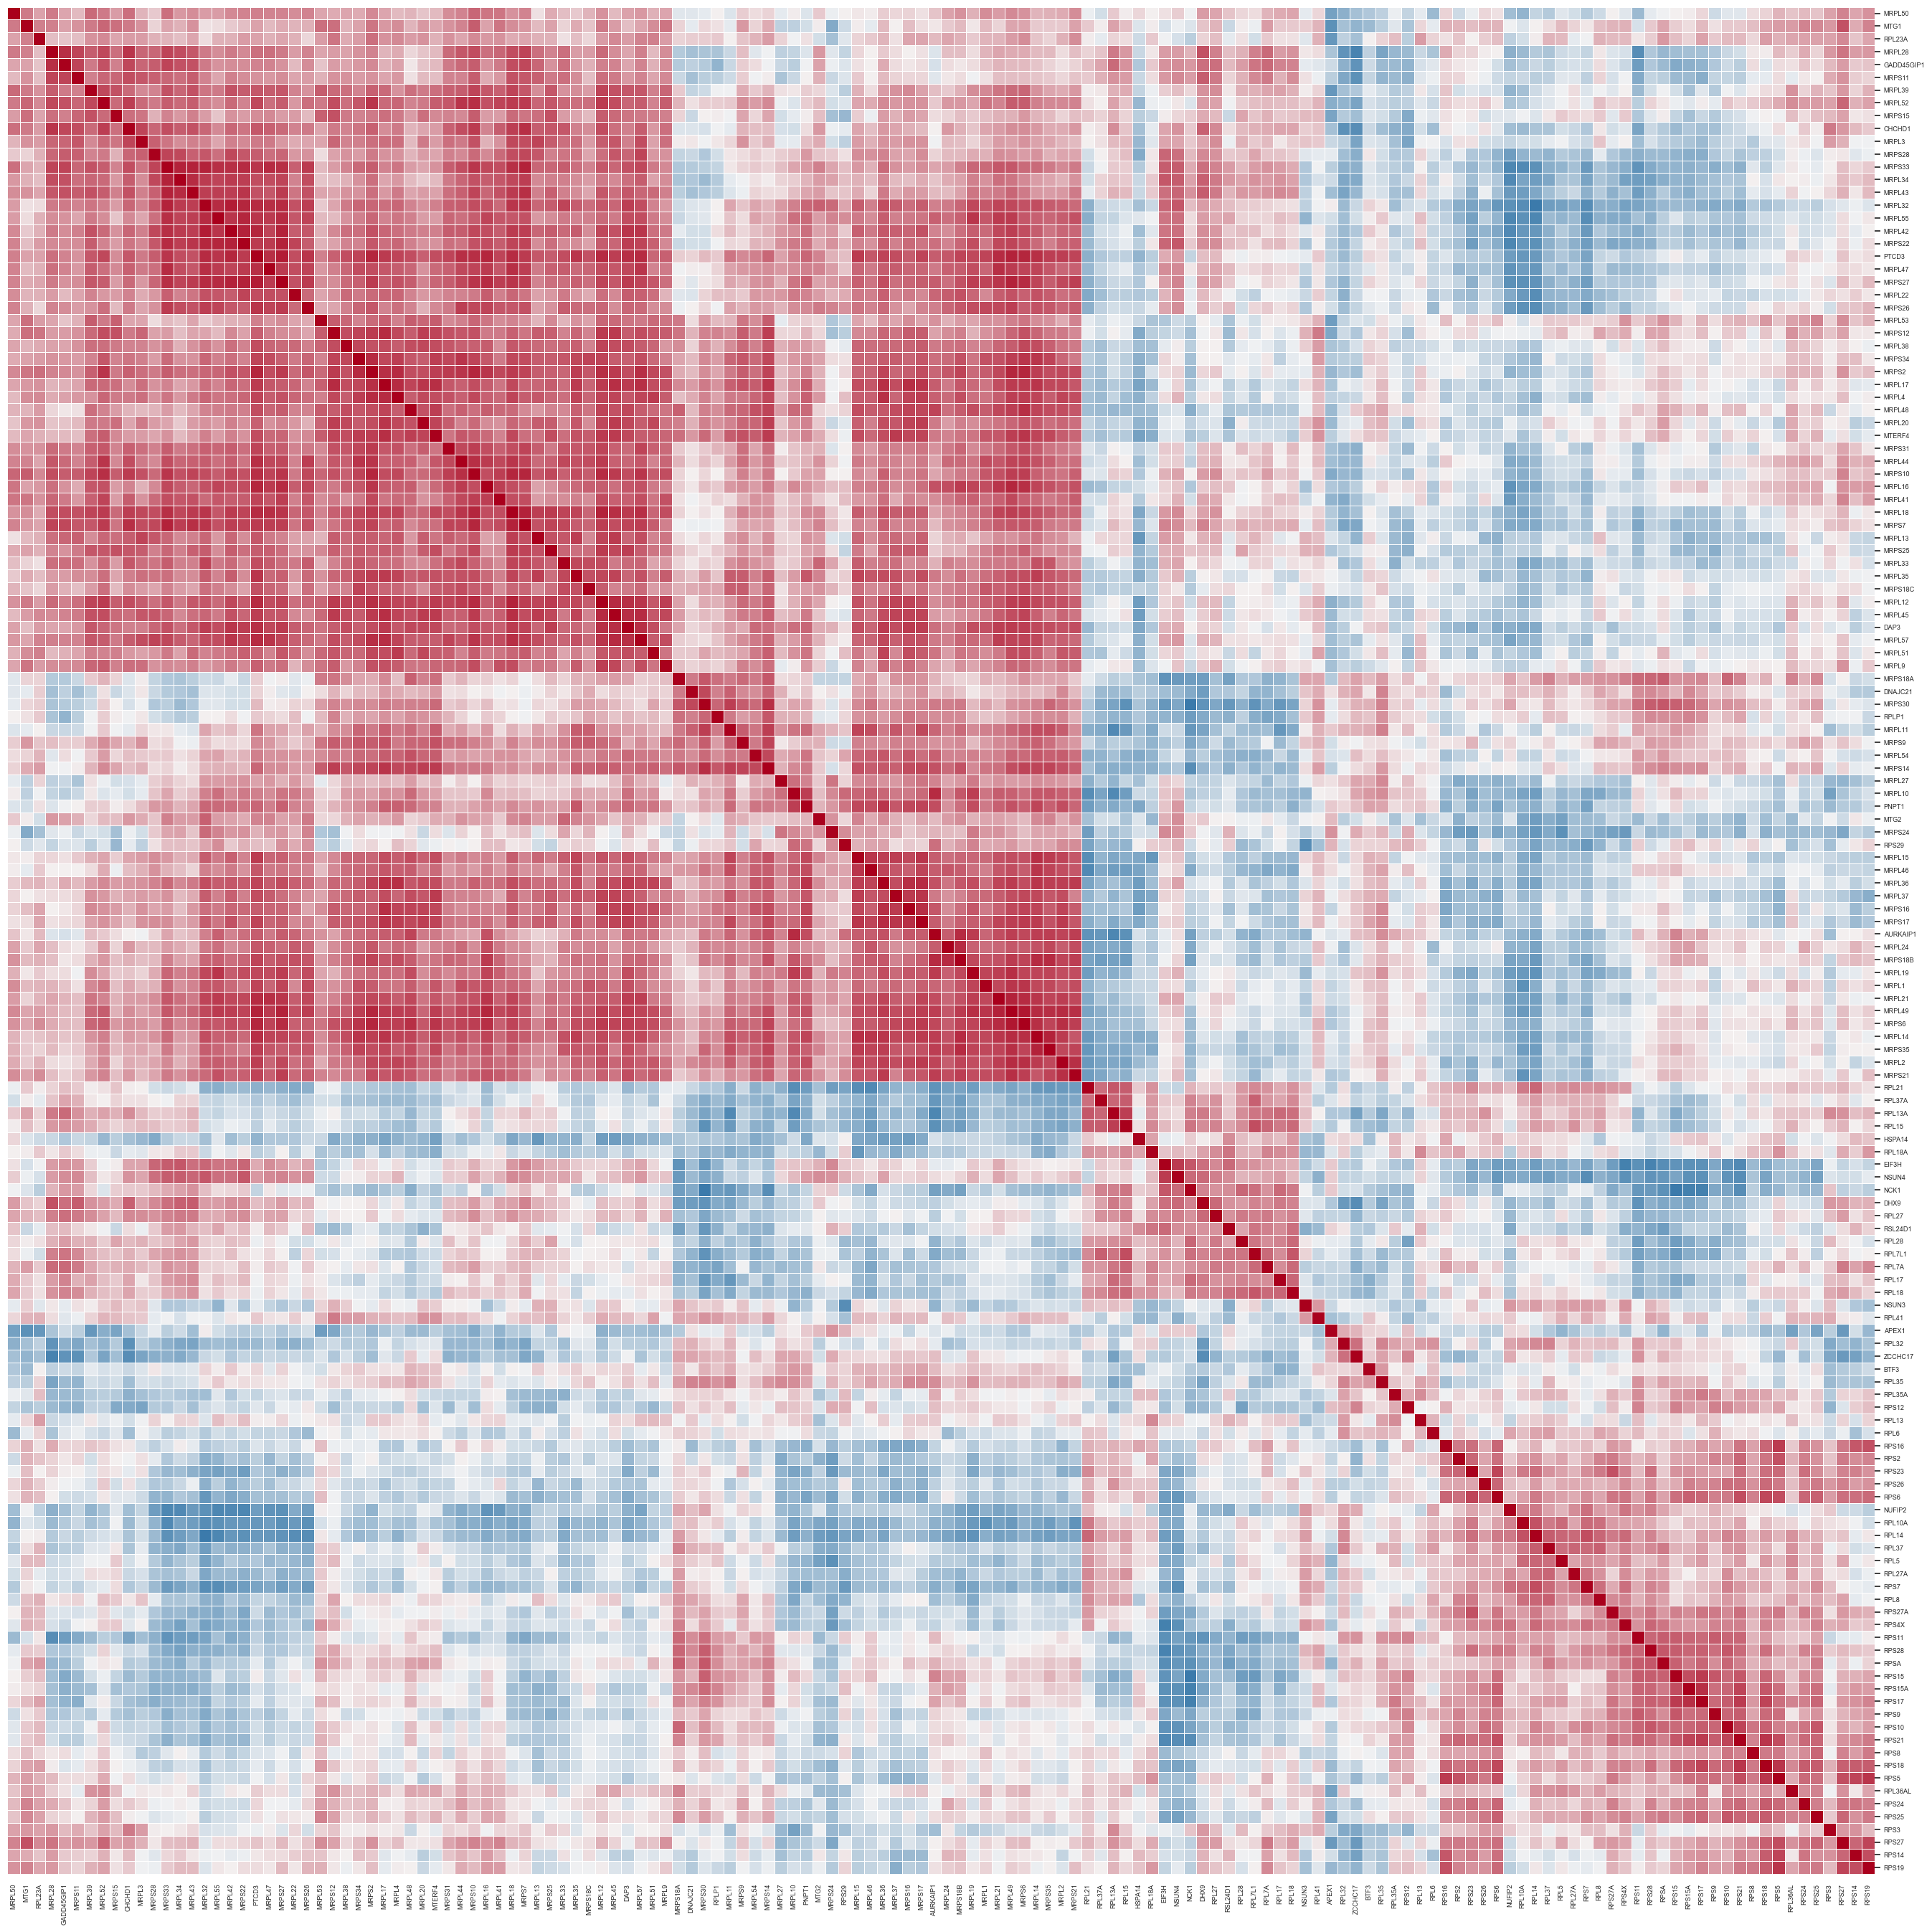

In [6]:
# Subset the profiles to select relevant genes
gene_set = 'Ribosome'
gene_list = gene_set_dict[gene_set]
genes_df =  df_hits_pca_DMEM[df_hits_pca_DMEM['Metadata_Foci_Barcode_MatchedTo_GeneCode'].isin(gene_list)]
genes_profiles = genes_df.set_index('Metadata_Foci_Barcode_MatchedTo_GeneCode')
# Cluster the profiles & draw the heatmap
clustered_heat_map(genes_profiles.T,
                   f'HeLa_DMEM_median_profile_heatmap_clustering_gene_hits_{gene_set}_plate_level.png',
                   .6,
                   0.6)
